### 1. Loading data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [19]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### 2. Data manipulation with pandas

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.replace("?",np.nan,inplace=True)
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df.drop(['Loan_ID'], axis = 1, inplace= True)

In [18]:
df.shape

(614, 12)

### 3. Split Dataset

In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.Loan_Status

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5,stratify=y)
X_train.head()

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
128   Male     Yes          1  Graduate           Yes            10513   
502   Male     Yes          2  Graduate            No             4865   
581   Male      No          0  Graduate            No             1836   
316   Male     Yes          2  Graduate            No             3717   
524   Male      No          0  Graduate            No             4680   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
128             3850.0       160.0             180.0             0.0   
502             5624.0       208.0             360.0             1.0   
581            33837.0        90.0             360.0             1.0   
316                0.0       120.0             360.0             1.0   
524             2087.0         NaN             360.0             1.0   

    Property_Area  
128         Urban  
502     Semiurban  
581         Urban  
316     Semiurban  
524     Semiurban

### 4. Feature engineering with pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [36]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

one = df[['Gender','Married', 'Education', 'Self_Employed']]
categoricn_cols = one.select_dtypes(include=['object']).columns
print(categoricn_cols)

oe = df[['Dependents', 'Property_Area']]
categorico_cols = oe.select_dtypes(include=['object']).columns
print(categorico_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Education', 'Self_Employed'], dtype='object')
Index(['Dependents', 'Property_Area'], dtype='object')


In [37]:
n_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [38]:
c_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])

In [54]:
cc_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('oe',OrdinalEncoder())
                       ])

In [55]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,numeric_cols),
                           ('categoricn',c_transformer,categoricn_cols),
                           ('categorico',cc_transformer,categorico_cols)
                       ])

In [56]:
#Create estimator
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier( criterion = 'entropy', max_depth=2)

In [57]:
mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [59]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('categoricn',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  (...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Education', 'Self_Employed'], dtype='object')),
                                                 ('categorico',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('oe',
                                                                   OrdinalEncoder())]),
                                                  Index(['Dependents', 'Property_Area'], dtype='object'))])),
                ('est',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2))])

### 5.Validation and Evaluation

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [61]:
y_hat = mymodel.predict(X_test)

<AxesSubplot:>

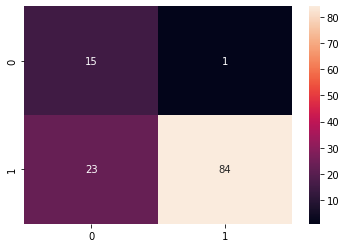

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_hat,y_test),annot=True)

In [63]:
report = classification_report(y_test, y_hat)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

           N       0.94      0.39      0.56        38
           Y       0.79      0.99      0.88        85

    accuracy                           0.80       123
   macro avg       0.86      0.69      0.72       123
weighted avg       0.83      0.80      0.78       123



### 6. Make Prediction for unknown sample

In [64]:
sample = X_test.iloc[0:1,:]
sample

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
414  Female     Yes          0  Not Graduate            No             2149   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
414             3237.0       178.0             360.0             0.0   

    Property_Area  
414     Semiurban

In [65]:
mymodel.predict(sample)[0]

'N'

### 7. Saving Machine Learning Model

In [66]:
import pickle
#save model 
pickle.dump(mymodel,open("mymodel.pkl","wb"))

In [68]:
model = pickle.load(open("mymodel.pkl", "rb"))

In [69]:
model.score(X_test,y_test)

0.8048780487804879

### 8. Hyperparamter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

criterion_param = ['gini', 'entropy']
max_depth_param = list(range(5,17,2))

grid_params_tree = [
  {
    'est__criterion' : criterion_param,
    'est__max_depth' : max_depth_param  
  }
]

gs_tree_pipeline = GridSearchCV(estimator=mymodel,
                               param_grid = grid_params_tree,
                               scoring = 'accuracy',
                               cv = 10
                               )
gs_models = gs_tree_pipeline.fit(X_train, y_train)

In [72]:
gs_models.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('categoricn',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Education', 'Self_Employed'], dtype='object')),
                                                 ('categorico',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('oe',
                                                                   OrdinalEncoder())]),
                                                  Index(['Dependents', 'Property_Area'], dtype='object'))])),
                ('est', DecisionTreeClassifier(max_depth=5))])

['N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y']
Report : 
              precision    recall  f1-score   support

           Y       0.78      0.47      0.59        38
           N       0.80      0.94      0.86        85

    accuracy                           0.80       123
   macro avg       0.79      0.71      0.73       123
weighted avg       0.79      0.80      0.78       123



<AxesSubplot:>

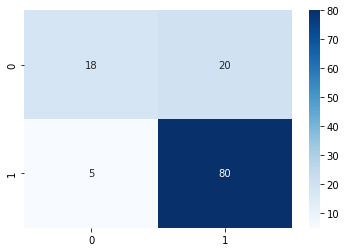

In [73]:
y_pred = gs_models.best_estimator_.predict(X_test)
print(y_pred)

#Summarise the fit of the model
report = classification_report(y_test, y_pred, target_names=['Y','N'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

In [74]:
pickle.dump(gs_models.best_estimator_,open("gsmodel.pkl",'wb'))

In [75]:
gsmodel = pickle.load(open("gsmodel.pkl",'rb'))

In [76]:
gsmodel.predict(sample)

array(['N'], dtype=object)